# Pre-treating data for analysis

In [29]:
repo_root = "../"
import sys
sys.path.append(repo_root)

In [30]:
#imports
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from datetime import datetime

In [31]:
#data imports 
filename = "../results/YouTube-with-sentiments_24-11-2024_15h52.csv"
youtube = pd.read_csv(filename)
youtube.head()


,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0,4,0.94,0.03,0.03


In [32]:
#deleting comments where users only identify each other (starting with @, ending with a space)
youtube['Comment'] = youtube['Comment'].fillna('').astype(str)

youtube = youtube[~youtube['Comment'].str.match(r'^@\w+\s*$')]
youtube.head()


,Unnamed: 0.1,Unnamed: 0,Timestamp,Username,VideoID,Comment,Date,Modified,NbLikes,join_key,positive,neutral,negative
0,0,0,2024-11-04T16:26:49Z,@st8275,Js4qqwdjA9M,Dufus-in-chief,2024-11-04T16:26:49Z,True,1,0,0.61,0.27,0.12
1,1,1,2024-11-04T14:11:51Z,@comingforya690,Js4qqwdjA9M,I thought the liberals hate the rich? Lmfao th...,2024-11-04T14:11:51Z,True,0,1,0.10,0.10,0.80
2,2,2,2024-11-04T12:59:38Z,@2ndhk552,Js4qqwdjA9M,Who gives af,2024-11-04T12:59:38Z,True,0,2,0.11,0.14,0.76
3,3,3,2024-11-04T03:08:23Z,@___KPR,Js4qqwdjA9M,No babe we don’t need your opinion babe. Trump...,2024-11-04T03:08:23Z,True,0,3,0.68,0.28,0.04
4,4,4,2024-11-02T20:11:12Z,@cynthiabarrow509,Js4qqwdjA9M,Yeah this will sway the vote,2024-11-02T20:11:12Z,True,0,4,0.94,0.03,0.03


In [33]:
videos_list = youtube['VideoID'].value_counts().index
renaming_posts = {}
for i,video in enumerate(list(videos_list)):
    renaming_posts[video] = "Video " + chr(ord('A')+i)
youtube['video_name'] = youtube['VideoID'].replace(renaming_posts)
#end exporting the correspondance to csv file between post and urls (for simplification of read)
renaming_table = pd.DataFrame(list(renaming_posts.items()), columns=['VideoID', 'video_name'])

# Save the table to a CSV file
renaming_table.to_csv('video_renaming_table.csv', index=False)

# Print the table to check
print(renaming_table)

       VideoID video_name
0  8zPor9l9SwI    Video A
1  1EuF7yfoyDE    Video B
2  YF7Hs4GeJkQ    Video C
3  EWUK5A-3LSI    Video D
4  Js4qqwdjA9M    Video E
5  y4BKfR5t1l8    Video F
6  w1u9IgepfAU    Video G
7  fxv-YhT3Ixc    Video H


In [34]:
comments_per_user = youtube.groupby(["Username"], as_index = False).agg(nb_interactions_on_all_videos = ("video_name", 'count')).sort_values(by="nb_interactions_on_all_videos")
count_post_user = youtube.groupby(["Username", "video_name"], as_index = False).agg(nb_interactions_on_post = ("video_name", 'count')).sort_values(by="nb_interactions_on_post")

In [35]:
comments_per_user

,Username,nb_interactions_on_all_videos
0,@-BumbleBerry-,1
6428,@joshuamontoya1146,1
6427,@joshualeclair9729,1
6425,@joshuaguzman7725,1
6424,@joshuafriesen4436,1
...,...,...
9243,@tasha1626,43
1072,@GOCAPSDMV,45
3977,@boss-ov7jd,51
2585,@SS-iv7wv,60


In [36]:
count_post_user

,Username,video_name,nb_interactions_on_post
0,@-BumbleBerry-,Video A,1
6527,@joshuamontoya1146,Video B,1
6528,@joshuaporterfield6774,Video A,1
6529,@joshuaschmidt323,Video B,1
6530,@joshuathompson9346,Video B,1
...,...,...,...
9392,@tasha1626,Video C,43
1085,@GOCAPSDMV,Video B,45
4039,@boss-ov7jd,Video A,51
2623,@SS-iv7wv,Video A,60


# Graphs

In [141]:
base_color = "#8ACE00"
brat_color = sns.dark_palette(base_color, n_colors=2)[1]

#colors for sentiment:
negative_shade = sns.dark_palette(base_color, n_colors=3)[0]
neutral_shade = sns.light_palette(base_color, n_colors=5)[1]
positive_shade =  sns.dark_palette(base_color, n_colors=3)[2]

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/51559023.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video_name', y='interaction_count', data=users_per_post, palette='viridis')


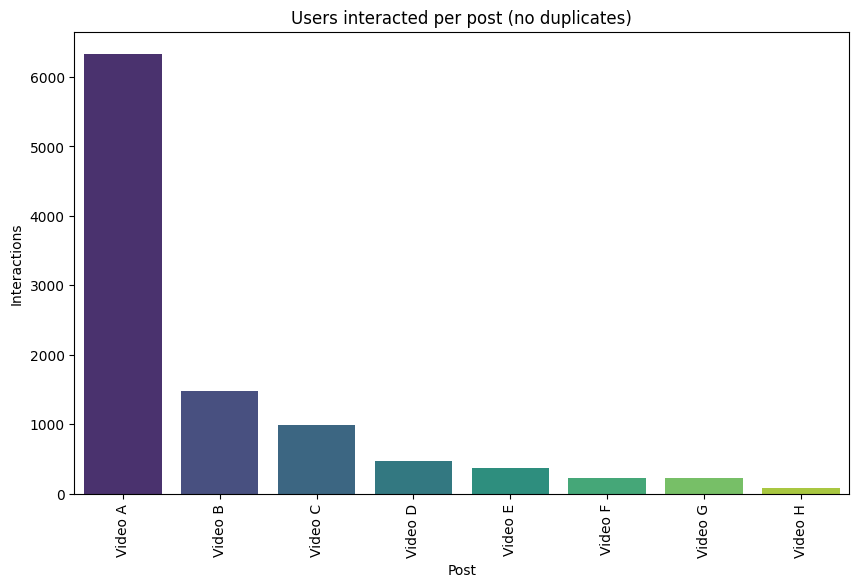

In [39]:
count_post_user.dropna()
users_per_post = count_post_user.groupby('video_name').size().reset_index()
users_per_post.rename( columns={0 :'interaction_count'}, inplace=True )


users_per_post = users_per_post.sort_values(by='interaction_count', ascending=False)



#barplotting 
plt.figure(figsize=(10, 6))
sns.barplot(x='video_name', y='interaction_count', data=users_per_post, palette='viridis')
plt.xticks(rotation=90)
plt.title("Users interacted per post (no duplicates)")
plt.xlabel("Post")
plt.ylabel("Interactions")
plt.show()

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/3818967329.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='video_name', y='share_of_users', data=users_per_post, palette='viridis')


Text(0, 0.5, 'Share of users that interacted with the post')

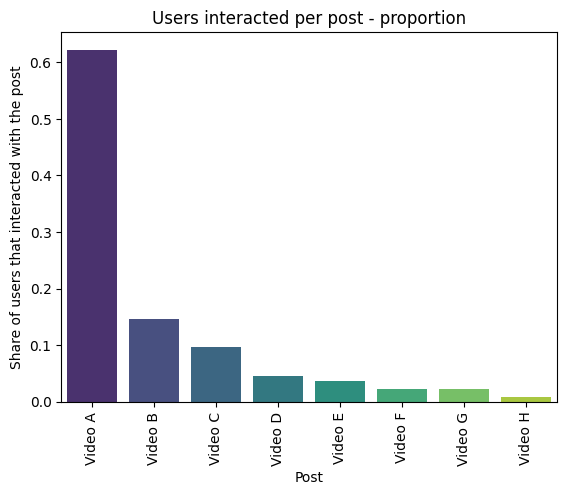

In [40]:

users_per_post['share_of_users'] = users_per_post['interaction_count']/sum(users_per_post['interaction_count'])
users_per_post
sns.barplot(x='video_name', y='share_of_users', data=users_per_post, palette='viridis')
plt.xticks(rotation=90)
plt.title("Users interacted per post - proportion")
plt.xlabel("Post")
plt.ylabel("Share of users that interacted with the post")



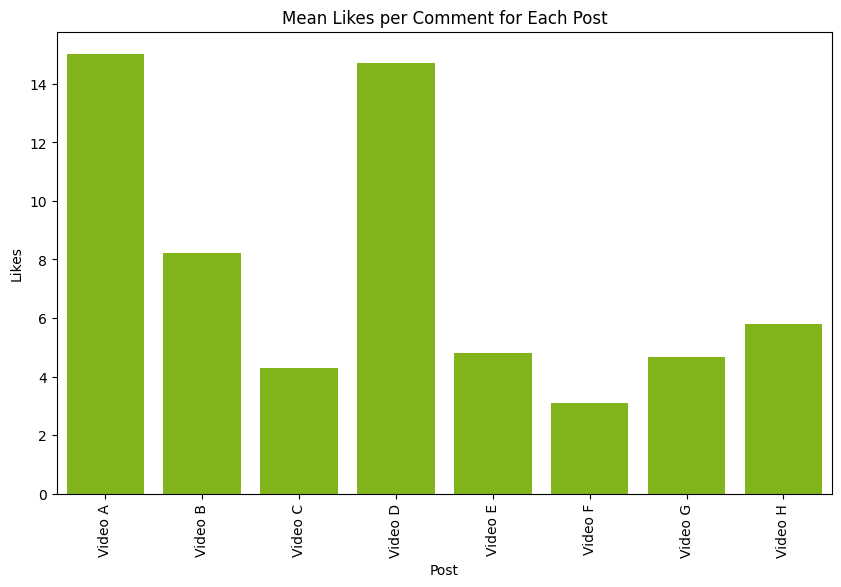

In [42]:
#mean comment likes per post 
mean_likes_per_post = youtube.groupby('video_name')['NbLikes'].mean().reset_index()
mean_likes_per_post.columns = ['post_name', 'mean_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_likes_per_post, x='post_name', y='mean_likes', color = base_color)
plt.xticks(rotation=90)
plt.title('Mean Likes per Comment for Each Post')
plt.xlabel('Post')
plt.ylabel('Likes')
plt.show()


In [49]:
unique_posts = sorted(youtube['video_name'].unique())


# for post in unique_posts:
#     post_likes = youtube[youtube['video_name'] == post]['NbLikes']
    
#     plt.figure(figsize=(2, 1))
#     sns.histplot(post_likes, bins=20, kde=True, color=base_color)
#     plt.title(f'Like Distribution for {post}')
#     plt.xlabel('Likes')
#     plt.ylabel('Frequency')
#     plt.show()

/Users/leo/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/leo/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/leo/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/leo/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/leo/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/leo/venv/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero enco

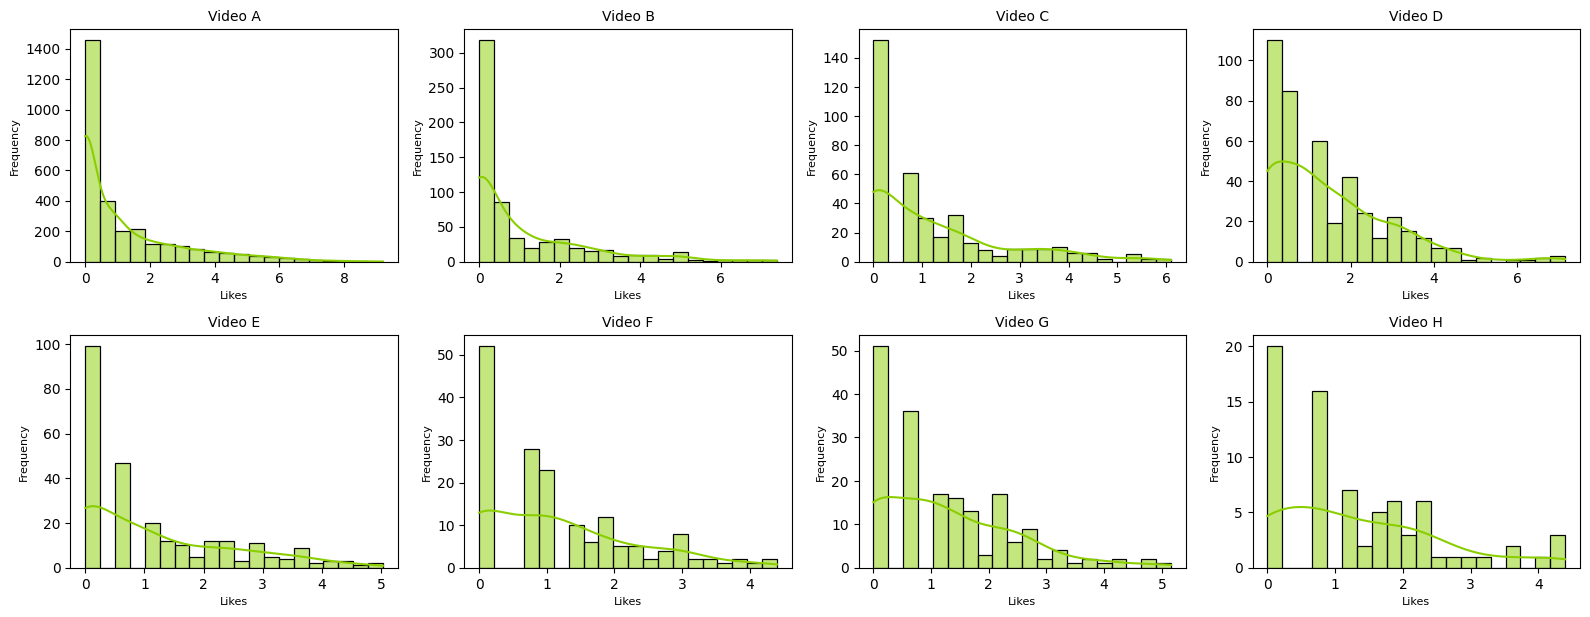

In [48]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Plot histograms for each post
for i, post in enumerate(unique_posts):
    ax = axes[i]
    post_likes = youtube[youtube['video_name'] == post]['NbLikes']
    
    sns.histplot(np.log(post_likes), bins=20, kde=True, color=base_color, ax=ax) #log plot
    # sns.histplot(post_likes, bins=20, kde=True, color=base_color, ax=ax)

    ax.set_title(f'{post}', fontsize=10)  # Add post name as title
    ax.set_xlabel('Likes', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

# Remove extra subplots (if any)
for j in range(len(unique_posts), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
plt.tight_layout()

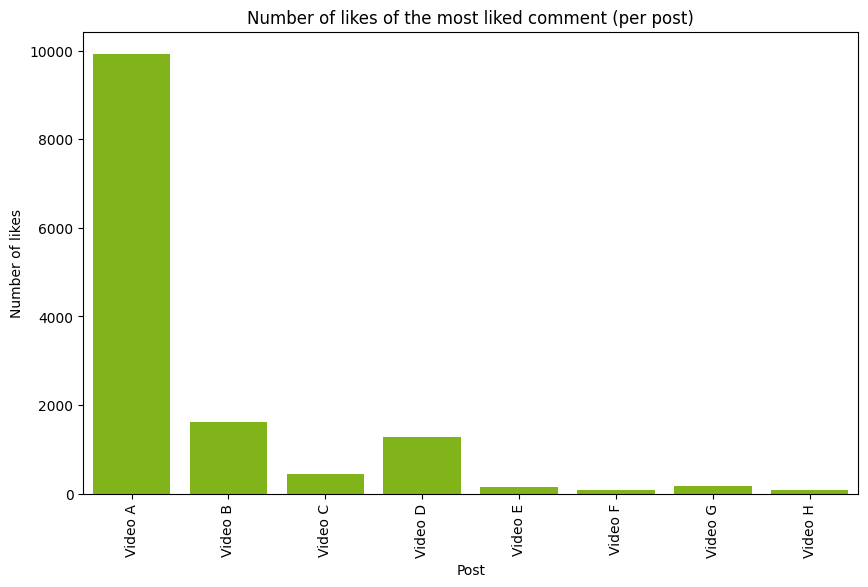

In [51]:
#Max likes per comment for each post : 

max_likes_per_post = youtube.groupby('video_name')['NbLikes'].max().reset_index()
max_likes_per_post.columns = ['video_name', 'max_likes']

brat_color = sns.dark_palette(base_color, n_colors=2)[1]
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=max_likes_per_post, x='video_name', y='max_likes', color=brat_color)
plt.xticks(rotation=90)
plt.title('Number of likes of the most liked comment (per post)')
plt.xlabel('Post')
plt.ylabel('Number of likes')
plt.show()

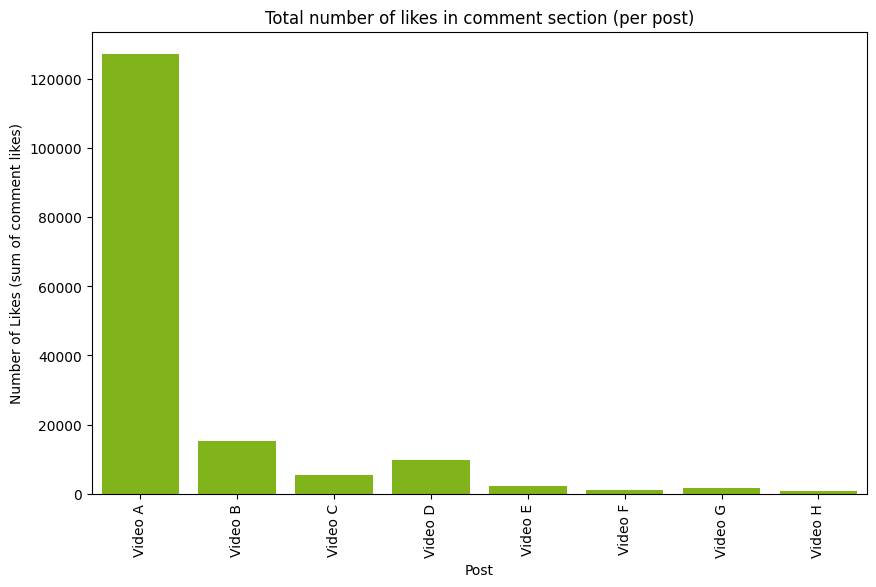

In [52]:
# Total likes in comments per post 
tot_likes_per_post = youtube.groupby('video_name')['NbLikes'].sum().reset_index()
tot_likes_per_post.columns = ['video_name', 'tot_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=tot_likes_per_post, x='video_name', y='tot_likes',  color=brat_color)
plt.xticks(rotation=90)
plt.title('Total number of likes in comment section (per post)')
plt.xlabel('Post')
plt.ylabel('Number of Likes (sum of comment likes)')
plt.show()

In [55]:
# Total likes & shares OF the post: didn't collect this info

In [ ]:
# Proportion de commentaires avec les emojis (barchart? piechart?)



In [ ]:
# NB OF USERS 
# COMMENT LENGTH 
# NB DE LIKES EN MOYENNE PAR POST PAR COM 
 
# PROPORTION DES COMS AVEC DES EMOJIS 
# COMS SEULEMENT AVEC EMOJIS / EMOJIS ET IDENTIFICATIONS 
# FAIRE DES BINS AVEC NB DE LIKES ? 

#nb de commentaires qui contiennent brat 
#nb de commentaires content kamala 
#nb de coms contenant trump/republican 


# Analysis of comments - and what they contain per post.

In [57]:
youtube['contains_brat'] = youtube['Comment'].str.contains('brat', case = False, regex=True)
youtube['contains_kamala'] = youtube['Comment'].str.contains('kamala', case = False, regex=True)
youtube['contains_trump'] = youtube['Comment'].str.contains('trump', case = False, regex=True)
youtube['contains_politics'] = youtube['Comment'].str.contains('politic', case = False, regex=True)
youtube['contains_democrat']= youtube['Comment'].str.contains('democrat', case = False, regex=True)
youtube['contains_republican'] = youtube['Comment'].str.contains('republican', case = False, regex=True)
youtube['contains_trump'] = youtube['Comment'].str.contains('trump', case = False, regex=True)

In [165]:
# create boolean columns for positive and negative:
t=0.8 #le threshold (arbitraire)
def threshold(x):
    if x > t: #Asrbitrairement mis à 0.8 pour ce petit test.
        return True
    else: return False

youtube["is_positive"]=youtube["positive"].apply(threshold)
youtube["is_neutral"]=youtube["neutral"].apply(threshold)
youtube["is_negative"]=youtube["negative"].apply(threshold)

def one_column_to_rule_them_all(x,y,z):
    if x:
        return "positive" #prioritize positive
    elif z:
        return "negative" #then negative
    else:
        return "neutral" #even if not detected neutral, it cannot be nothing

youtube["sentiment"] = youtube.apply(lambda x: one_column_to_rule_them_all(x.is_positive, x.is_neutral, x.is_negative), axis=1)

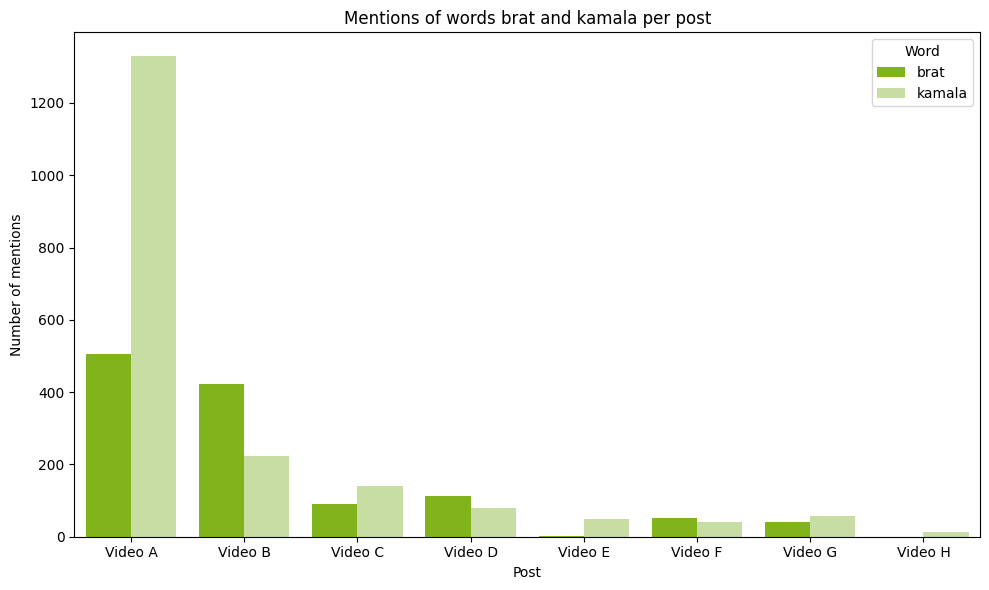

In [169]:
mentions = youtube.groupby('video_name')[['contains_brat', 'contains_kamala']].sum()

# Passer en colonnes pour un tracé simultané
mentions.reset_index(inplace=True)

# Visualisation avec sns.barplot
mentions_long = mentions.melt(id_vars='video_name', var_name='word', value_name='mentions')

# Renommer les mots pour plus de clarté
mentions_long['word'] = mentions_long['word'].str.replace('contains_', '')


base_color = "#8ACE00"
lighter_shade = sns.light_palette(base_color, n_colors=4)[1]  # Slightly less light
darker_shade = sns.dark_palette(base_color, n_colors=2)[1]
custom_palette = [ darker_shade, lighter_shade]
# Map the palette to the words
word_palette = dict(zip(mentions_long['word'].unique(), custom_palette))

# Tracé du graphique
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=mentions_long,
    x='video_name',
    y='mentions',
    hue='word',
    palette=word_palette
)
plt.title('Mentions of words brat and kamala per post')
plt.xlabel('Post')
plt.ylabel('Number of mentions')
plt.legend(title='Word')
plt.tight_layout()
plt.savefig('../viz/brat_kamala_per_post.png',bbox_inches='tight', transparent=True, dpi=300)

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/292512806.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


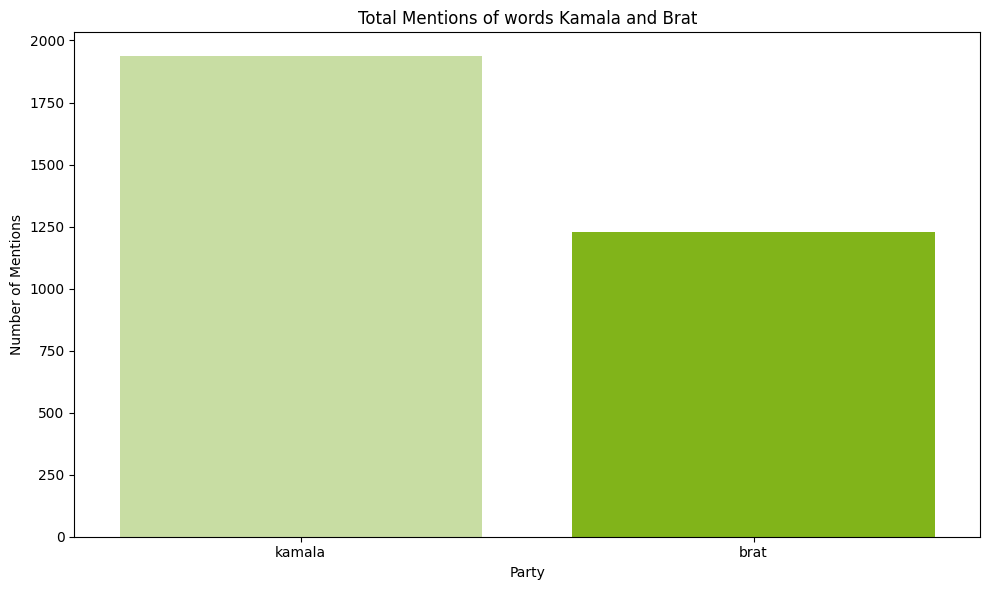

In [170]:
#total mentions in the dataset
overall_mentions_k = youtube[['contains_kamala', 'contains_brat']].sum().reset_index()
overall_mentions_k.columns = ['word', 'mentions']

overall_mentions_k['word'] = overall_mentions_k['word'].str.replace('contains_', '')
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=overall_mentions_k,
    x='word',
    y='mentions',
    palette=[lighter_shade, darker_shade]
)
plt.title('Total Mentions of words Kamala and Brat')
plt.xlabel('Party')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_kamala.png',bbox_inches='tight', transparent=True, dpi=300)

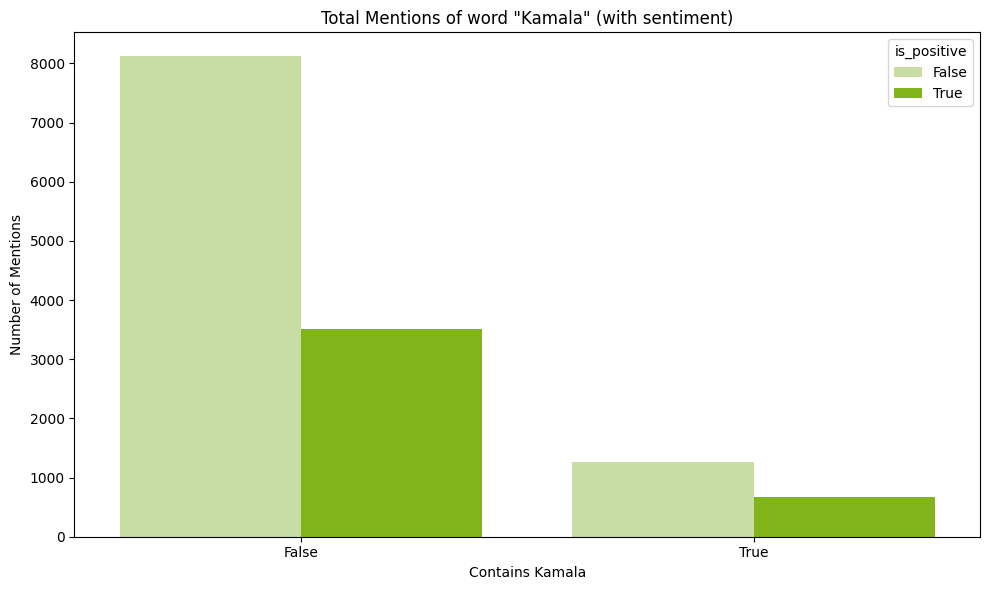

In [156]:
plt.figure(figsize=(10,6), facecolor='w')
sns.countplot(
    data=youtube,
    x='contains_kamala',
    palette=[lighter_shade, darker_shade],
    hue='is_positive' 
)
plt.title('Total Mentions of word "Kamala" (with sentiment)')
plt.xlabel('Contains Kamala')
plt.ylabel('Number of Mentions')
plt.tight_layout()

## Same but with sentiment !

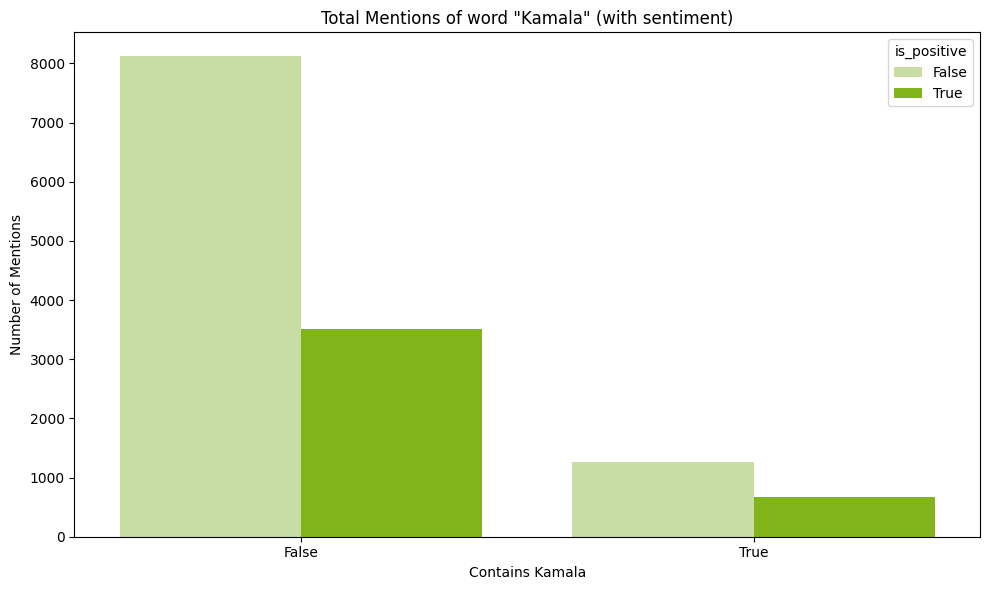

In [171]:

#total mentions in the dataset

plt.figure(figsize=(10,6), facecolor='w')
sns.countplot(
    data=youtube,
    x='contains_kamala',
    palette=[lighter_shade, darker_shade],
    hue='is_positive' 
)
plt.title('Total Mentions of word "Kamala" (with sentiment)')
plt.xlabel('Contains Kamala')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_kamala_sentiment.png',bbox_inches='tight', transparent=True, dpi=300)

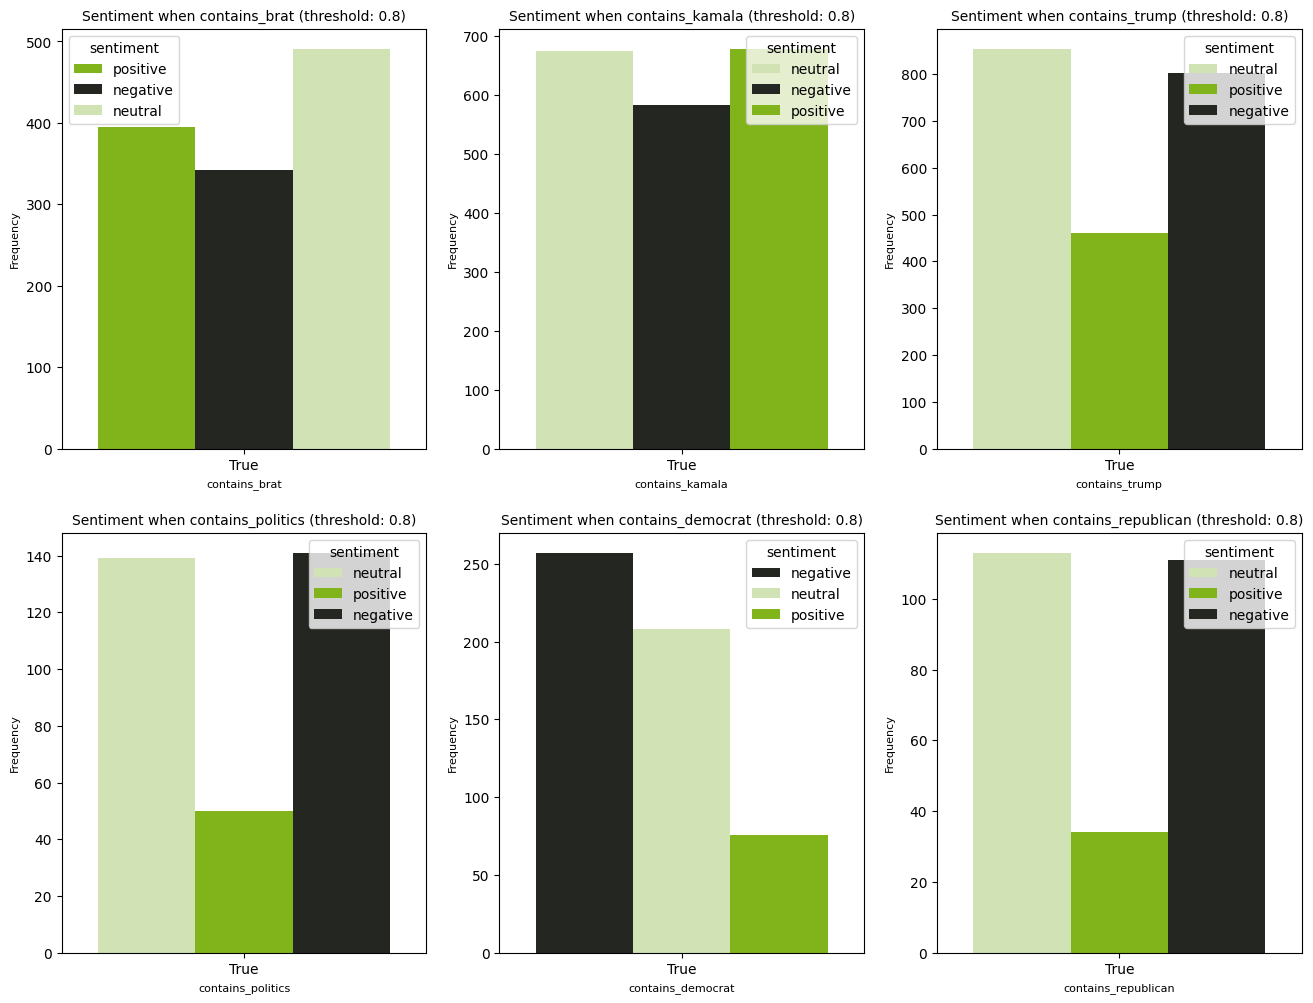

In [172]:
fig, axes = plt.subplots(2, 3, figsize=(16, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Plot histograms for each post
contains_michels = ['contains_brat', 'contains_kamala', 'contains_trump', 'contains_politics', 'contains_democrat', 'contains_republican']

for i, contains_michel in enumerate(contains_michels):
    ax = axes[i]
    post_likes = youtube[youtube[contains_michel]]
    
    sns.countplot(
        data = youtube[youtube[contains_michel]], #keep only those where it is true
        x=contains_michel,
        hue='sentiment',
        palette={'negative':negative_shade, 'neutral': neutral_shade, 'positive':positive_shade}, 
        ax=ax)
    ax.set_title(f'Sentiment when {contains_michel} (threshold: {t})', fontsize=10)  # Add post name as title
    ax.set_xlabel(contains_michel, fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

plt.savefig('../viz/tot_ment_kamala_brat.png',bbox_inches='tight', transparent=True, dpi=300)

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/2081217109.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


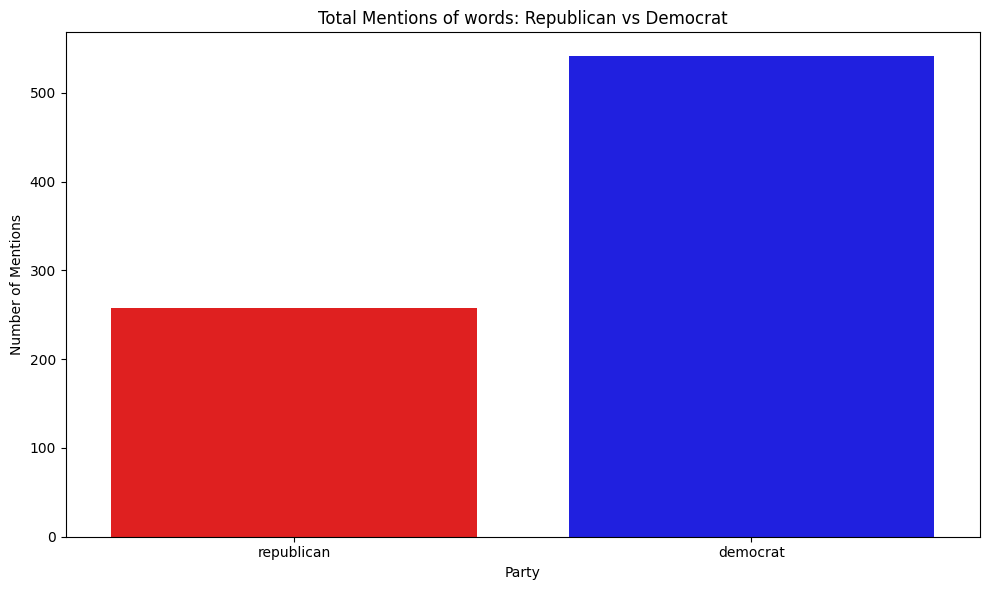

In [173]:
#mentions democrat vs republican in total 
overall_mentions = youtube[['contains_republican', 'contains_democrat']].sum().reset_index()
overall_mentions.columns = ['party', 'mentions']

overall_mentions['party'] = overall_mentions['party'].str.replace('contains_', '')
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=overall_mentions,
    x='party',
    y='mentions',
    palette=['red', 'blue']  # Red for republican, blue for democrat
)
plt.title('Total Mentions of words: Republican vs Democrat')
plt.xlabel('Party')
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_rep_dem.png',bbox_inches='tight', transparent=True, dpi=300)

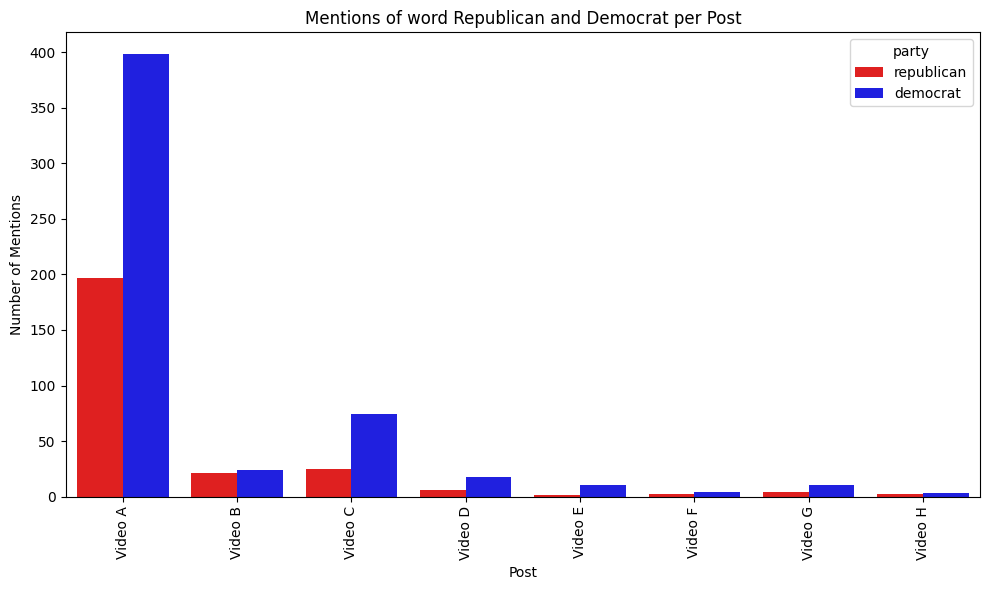

In [174]:
#mentions democrat vs republican per post 

rep_dem_mentions = youtube.groupby('video_name')[['contains_republican', 'contains_democrat']].sum().reset_index()

# Melt to long format for easier plotting
rep_dem_mentions_long = rep_dem_mentions.melt(
    id_vars='video_name',
    var_name='party',
    value_name='mentions'
)

# Clean column names for better visualization
rep_dem_mentions_long['party'] = rep_dem_mentions_long['party'].str.replace('contains_', '')
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=rep_dem_mentions_long,
    x='video_name',
    y='mentions',
    hue='party',
    palette={'republican': 'red', 'democrat': 'blue'}
)
plt.title('Mentions of word Republican and Democrat per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_rep_dem.png',bbox_inches='tight', transparent=True, dpi=300)

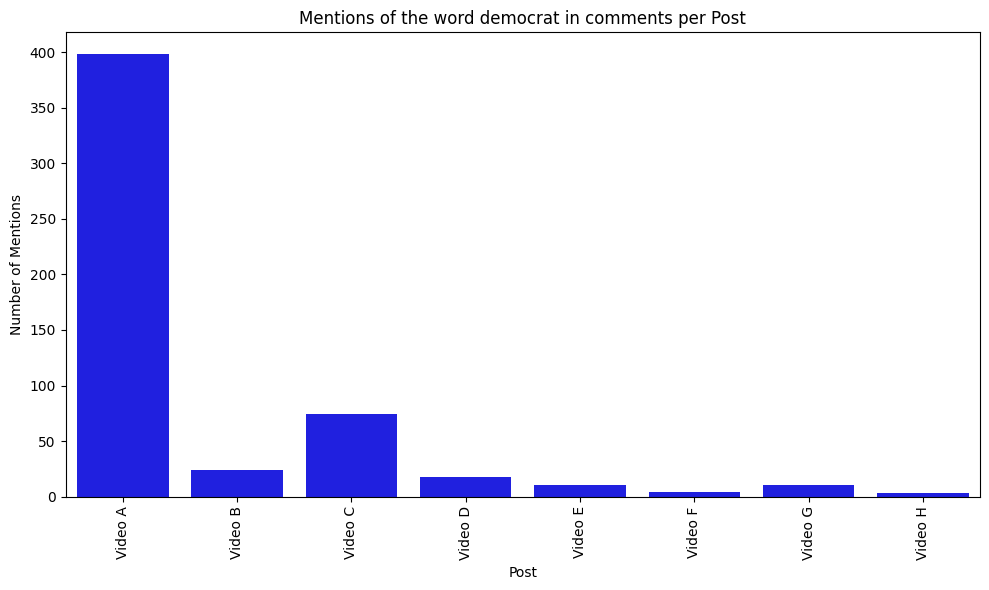

In [175]:
#mentions of democrat per post 

demo_mentions_per_post = youtube.groupby('video_name')['contains_democrat'].sum().reset_index()
demo_mentions_per_post.columns = ['video_name', 'mentions']
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=demo_mentions_per_post,
    x='video_name',
    y='mentions',
    color='blue'  # Single color for politics
)
plt.title('Mentions of the word democrat in comments per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_dem.png',bbox_inches='tight', transparent=True, dpi=300)

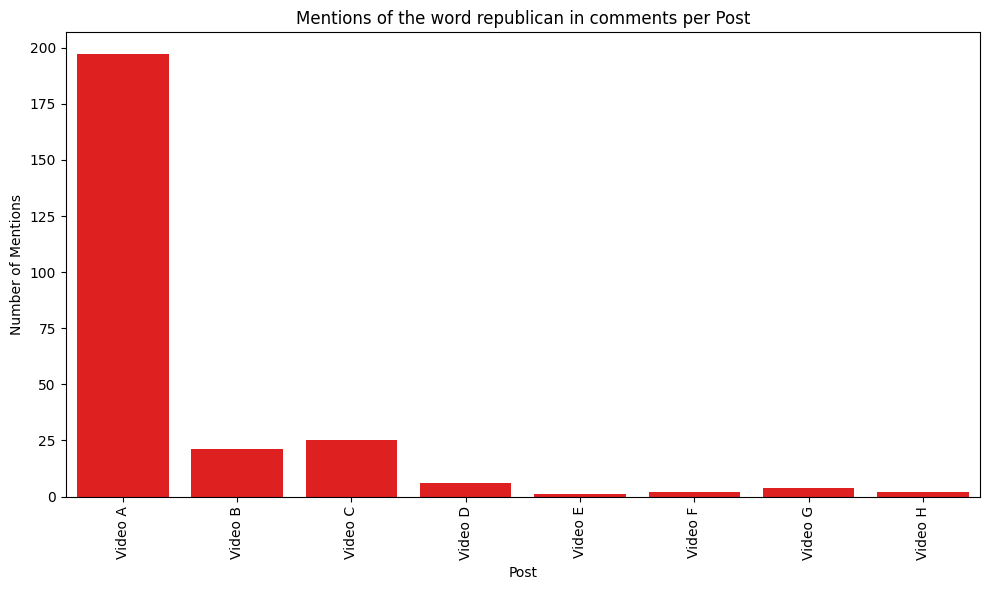

In [176]:
#mentions of republican per post 
rep_mentions_per_post = youtube.groupby('video_name')['contains_republican'].sum().reset_index()
rep_mentions_per_post.columns = ['video_name', 'mentions']
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=rep_mentions_per_post,
    x='video_name',
    y='mentions',
    color='red'  # Single color for politics
)
plt.title('Mentions of the word republican in comments per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_rep.png',bbox_inches='tight', transparent=True, dpi=300)

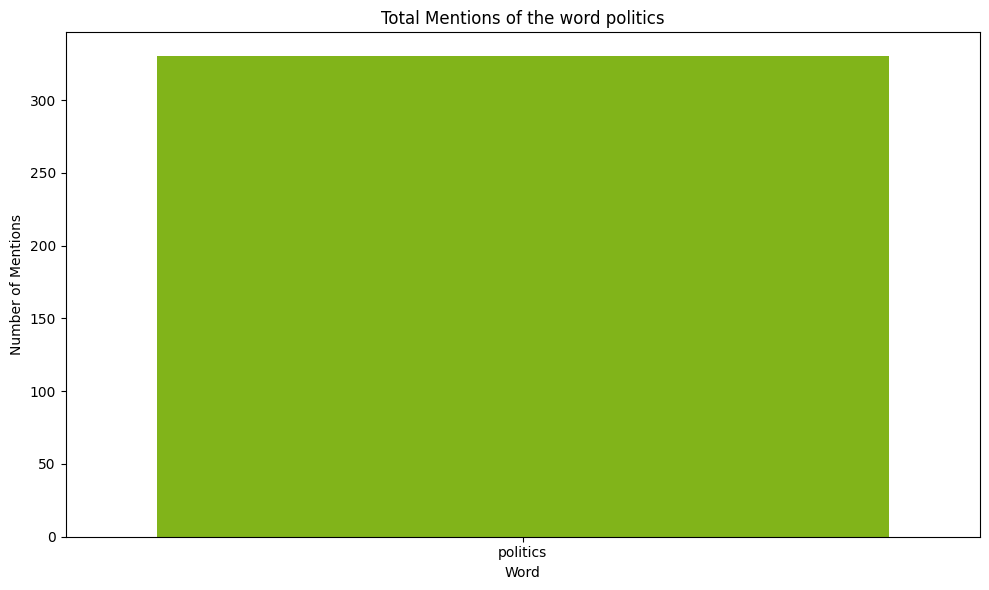

In [177]:
#mentions of politics in total
total_politics_mentions = youtube['contains_politics'].sum()
politics_mentions_df = pd.DataFrame({'category': ['politics'], 'mentions': [total_politics_mentions]})
plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=politics_mentions_df,
    x='category',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Total Mentions of the word politics')
plt.xlabel("Word")
plt.ylabel('Number of Mentions')
plt.tight_layout()
plt.savefig('../viz/tot_ment_politics.png',bbox_inches='tight', transparent=True, dpi=300)

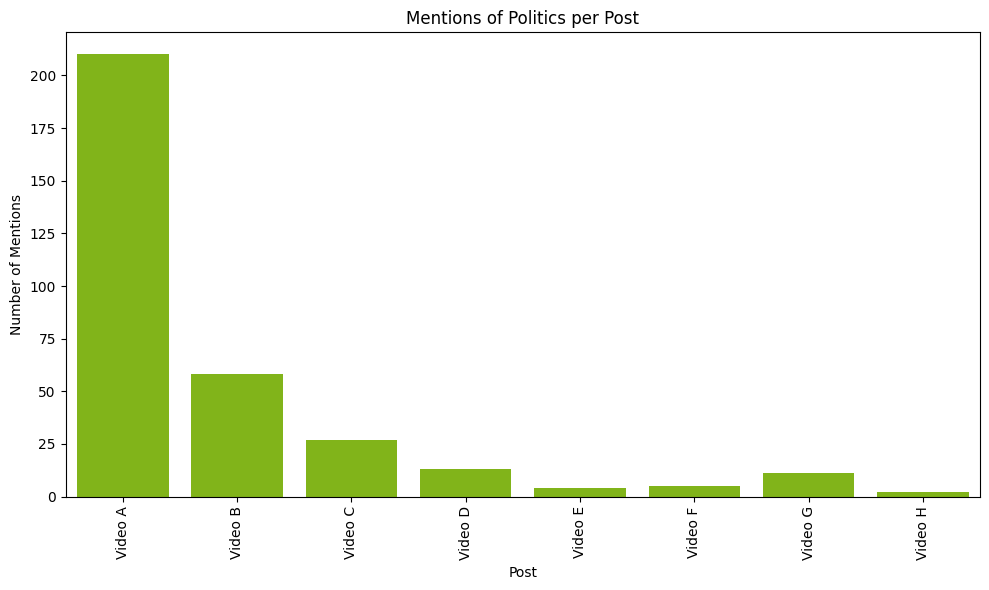

In [178]:
#mentions of politics per post 
politics_mentions_per_post = youtube.groupby('video_name')['contains_politics'].sum().reset_index()
politics_mentions_per_post.columns = ['video_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=politics_mentions_per_post,
    x='video_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of Politics per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_politics.png',bbox_inches='tight', transparent=True, dpi=300)

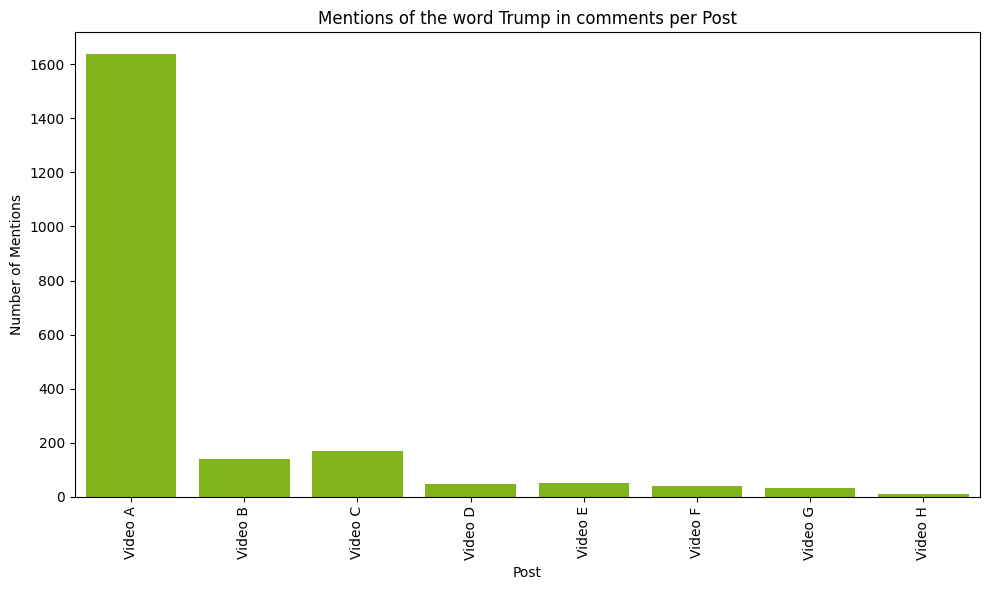

In [179]:
#mentions of democrat per post 

trump_mentions_per_post = youtube.groupby('video_name')['contains_trump'].sum().reset_index()
trump_mentions_per_post.columns = ['video_name', 'mentions']

plt.figure(figsize=(10,6), facecolor='w')
sns.barplot(
    data=trump_mentions_per_post,
    x='video_name',
    y='mentions',
    color=base_color  # Single color for politics
)
plt.title('Mentions of the word Trump in comments per Post')
plt.xlabel('Post')
plt.ylabel('Number of Mentions')
plt.xticks(rotation=90)
plt.tight_layout()
plt.savefig('../viz/per_post_trump.png',bbox_inches='tight', transparent=True, dpi=300)

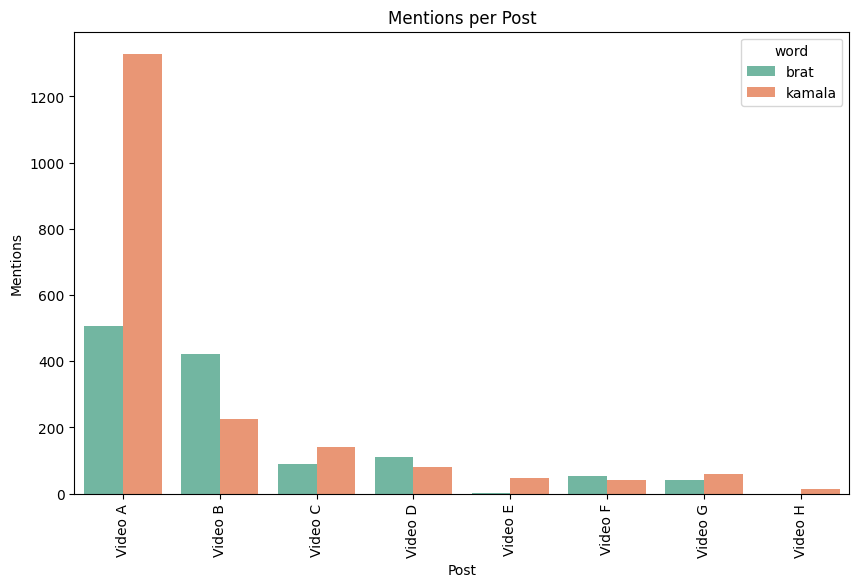

In [21]:

# Compter les mentions pour chaque mot par post
mentions = youtube.groupby('video_name')[['contains_brat', 'contains_kamala']].sum()

# Passer en colonnes pour un tracé simultané
mentions.reset_index(inplace=True)

# Visualisation avec sns.barplot
mentions_long = mentions.melt(id_vars='video_name', var_name='word', value_name='mentions')

# Renommer les mots pour plus de clarté
mentions_long['word'] = mentions_long['word'].str.replace('contains_', '')

# Tracé du graphique
plt.figure(figsize=(10, 6))
sns.barplot(
    data=mentions_long,
    x='video_name',
    y='mentions',
    hue='word',
    palette='Set2'
)
plt.xticks(rotation=90)
plt.title("Mentions per Post")
plt.xlabel("Post")
plt.ylabel("Mentions")
plt.show()


/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/3929713008.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=mean_likes_per_post, x='video_name', y='mean_likes', palette='Blues_d')


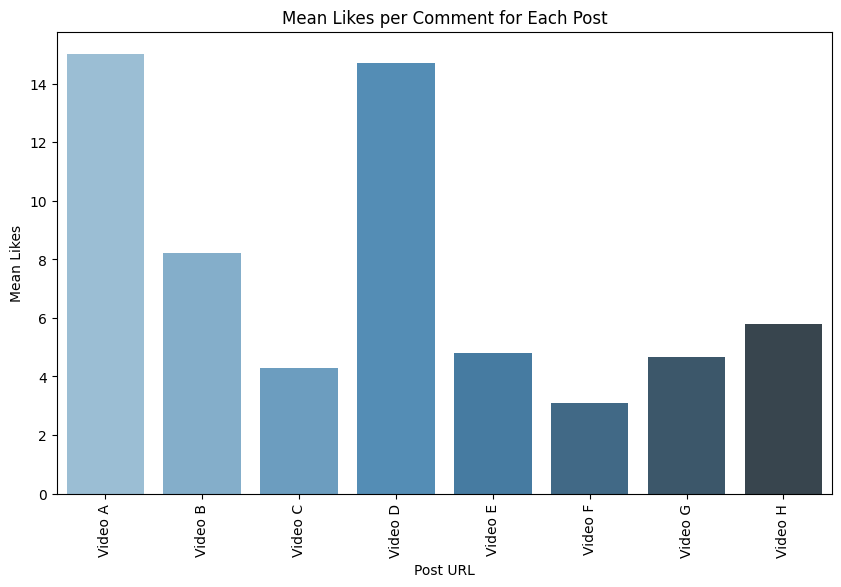

In [23]:
#mean comment likes per post 
mean_likes_per_post = youtube.groupby('video_name')['NbLikes'].mean().reset_index()
mean_likes_per_post.columns = ['video_name', 'mean_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=mean_likes_per_post, x='video_name', y='mean_likes', palette='Blues_d')
plt.xticks(rotation=90)
plt.title('Mean Likes per Comment for Each Post')
plt.xlabel('Post URL')
plt.ylabel('Mean Likes')
plt.show() #ptet compute ecart type ?

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/786295150.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=max_likes_per_post, x='video_name', y='max_likes', palette='Reds_d')


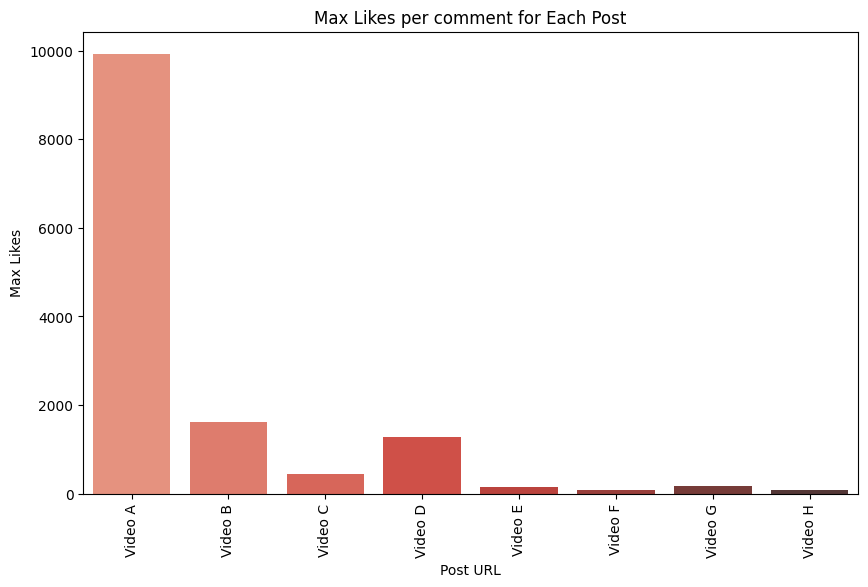

In [24]:
#Max likes per comment for each post : 

max_likes_per_post = youtube.groupby('video_name')['NbLikes'].max().reset_index()
max_likes_per_post.columns = ['video_name', 'max_likes']

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=max_likes_per_post, x='video_name', y='max_likes', palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Max Likes per comment for Each Post')
plt.xlabel('Post URL')
plt.ylabel('Max Likes')
plt.show()

In [ ]:
fig, axes = plt.subplots(4, 4, figsize=(16, 12))  # Adjust size as needed
axes = axes.flatten()  # Flatten to easily iterate over the axes

# Plot histograms for each post
for i, post in enumerate(unique_posts):
    ax = axes[i]
    post_likes = youtube[youtube['video_name'] == post]['NbLikes']
    
    sns.histplot(post_likes, bins=20, kde=True, color='green', ax=ax)
    ax.set_title(f'{post}', fontsize=10)  # Add post name as title
    ax.set_xlabel('Likes', fontsize=8)
    ax.set_ylabel('Frequency', fontsize=8)

# Remove extra subplots (if any)
for j in range(len(unique_posts), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for clarity
plt.tight_layout()
plt.savefig('../viz/comment_likes_per_posts.png',bbox_inches='tight', transparent=True, dpi=300)

/var/folders/d9/w3wlldnd20s584r1s8_wcqlh0000gp/T/ipykernel_15767/4208680462.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tot_likes_per_post, x='video_name', y='tot_likes', palette='Reds_d')


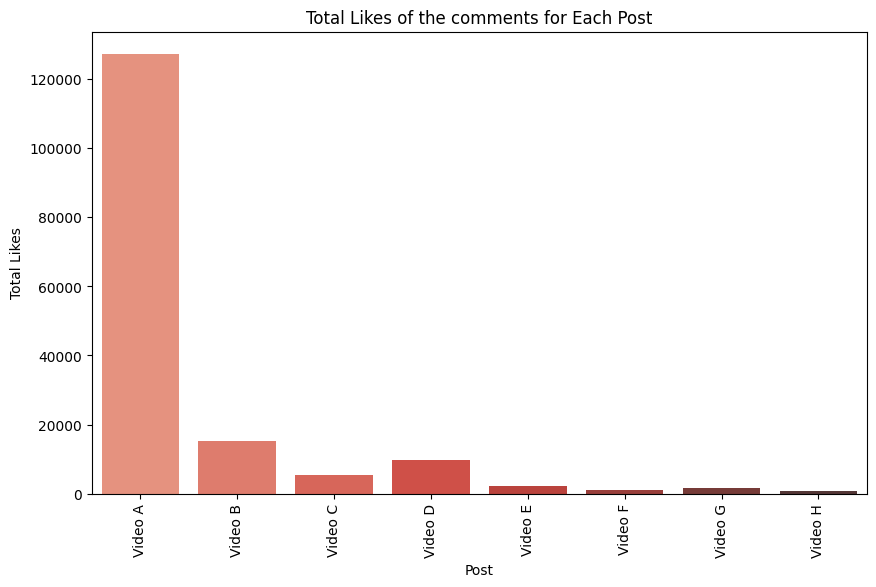

In [27]:
# Total likes in comments per post 
tot_likes_per_post = youtube.groupby('video_name')['NbLikes'].sum().reset_index()
tot_likes_per_post.columns = ['video_name', 'tot_likes']
plt.figure(figsize=(10, 6))
sns.barplot(data=tot_likes_per_post, x='video_name', y='tot_likes', palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Total Likes of the comments for Each Post')
plt.xlabel('Post')
plt.ylabel('Total Likes')
plt.show()

In [119]:
youtube.dtypes

Comment Number (ID)              int32
Nickname                        string
User @                          string
User URL                        object
Comment Text                    object
Time                    datetime64[ns]
Likes                            int32
Profile Picture URL             object
Is 2nd Level Comment            object
User Replied To                 object
Number of Replies                int32
post_url                        object
shown_comments                   int32
scraped_comments                 int32
difference                       int32
publisher                       object
post_likes                      object
post_shares                     object
post_description                object
date_scraped                    object
post_name                       object
ratio_scraped_shown            float64
contains_brat                     bool
contains_kamala                   bool
contains_trump                    bool
contains_politics        

In [28]:
# Total likes OF the post 

likes_per_post = youtube.groupby('video_name')['post_likes']
likes_per_post.columns = ['video_name', 'likes']
# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=likes_per_post, x='video_name', y='likes', palette='Reds_d')
plt.xticks(rotation=90)
plt.title('Likes of the post')
plt.xlabel('Post')
plt.ylabel('Number of Likes')
plt.show()

KeyError: 'Column not found: post_likes'

In [ ]:
#Number of comments per post 


# TF-IDF